## Exploratory Analysis 
Following the data cleansing and organisation phase, we have a unified table where the column names have been abbreviated as detailed below:

- LS: Percentage of people reporting low life satisfaction
- WW: Percentage of people reporting low levels of feeling that the things they do in life are worthwhile
- H: Percentage of people reporting low happiness yesterday
- FA: Percentage of people reporting feeling high anxiety yesterday
- CC: Consumer confidence Index value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from scipy.stats import linregress


In [2]:
# Read the xls file and the correct sheet
df = pd.read_excel("WB.xls", sheet_name="data_cleaned")
df.head()


,Quarter,LS,WW,H,FA,CC
0,2011-Q2,7.2,5.0,11.2,23.1,-25.600000
1,2011-Q3,6.7,4.9,10.8,21.6,-30.200000
2,2011-Q4,6.1,4.5,10.7,21.3,-32.000000
3,2012-Q1,6.4,4.6,10.9,21.1,-29.466667
4,2012-Q2,5.9,4.3,10.7,21.3,-30.200000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  54 non-null     object 
 1   LS       54 non-null     float64
 2   WW       54 non-null     float64
 3   H        54 non-null     float64
 4   FA       54 non-null     float64
 5   CC       54 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


Text(0.5, 1.0, 'Wellbeing Correlation Heatmap')

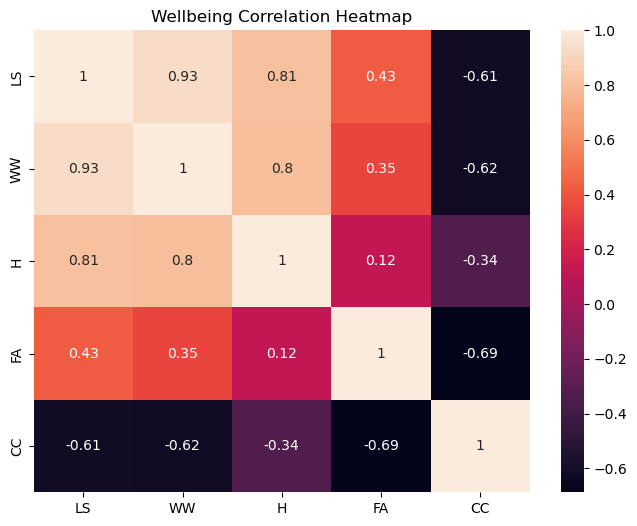

In [4]:
# Select only numerical columns and create the heatmap
cols = ["LS", "WW", "H", "FA", "CC"]
plt.figure(figsize = (8,6))
correlation_matrix = df[cols].corr()
sns.heatmap(data = correlation_matrix, annot = True)
plt.title("Wellbeing Correlation Heatmap")

#### From the analysis of the chart "Wellbeing Correlation Heatmap', we can identify 3 primary points:

##### 01. We can see the well-being variables show a strong positive correlation, with high values across the board. Since these three indicators measure related aspects of well-being, it makes sense that as more people report low satisfaction, they also report low life purpose and low happiness:

- LS x WW = 0.93
- LS x H = 0.81
- WW x H = 0.80

##### 02. We can observe that the Anxiety variable (FA) is different from the others, showing low correlations with LS, WW, and H:

- FA x LS = 0.43
- FA x WW = 0.35
- FA x H = 0.12

Anxiety does not follow the same strong pattern as the other well-being measures. It tends to vary more independently, possibly because anxiety is more related to economic insecurity, stressful events, the cost-of-living crisis, etc., whereas LS, WW, and H are generally more stable and subjective.

##### 03. Consumer Confidence (CC) has a significant negative correlation with all well-being indicators:

- CC x LS = -0.61
- CC x WW = -0.62
- CC x H = -0.34
- CC x FA = -0.69

We can observe that when consumer confidence declines, there is a deterioration in well-being indicators. This link is particularly strong with the Anxiety feeling (FA = -0.69), which shows the highest correlation among the indicators.

The lower the economic confidence in the country, the higher the anxiety reported by the population. This strongly suggests a clear link between the economic climate and mental health.

## Anxiety - Consumer Confidence Linear Regression 


LinregressResult(slope=-0.08991871942000536, intercept=19.77782562144324, rvalue=-0.6873252958938032, pvalue=9.455719848468629e-09, stderr=0.01317746575254123, intercept_stderr=0.27451610273972116)


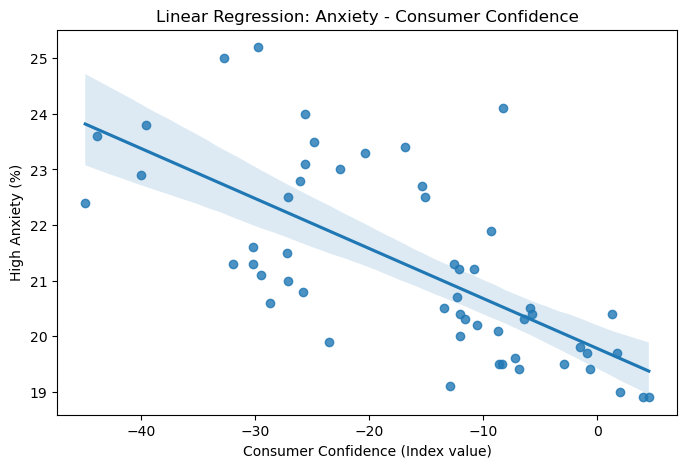

In [7]:
# select only consumer confidence and feeling anxious columns:
x = df["CC"]
y = df["FA"]

# Create Linear regression
res = linregress(x, y)
print(res)

# Plot chart
plt.figure(figsize=(8,5))
sns.regplot(x=x, y=y)
plt.title("Linear Regression: Anxiety - Consumer Confidence")
plt.xlabel("Consumer Confidence (Index value)")
plt.ylabel("High Anxiety (%)")
plt.show()



We can observe: 
- A negative slope with an angular coefficient (slope) of $-0.0899$. This indicates that for every 1-point increase in Consumer Confidence (CC), Anxiety (FA) decreases by approximately $0.09$ percentage points.
- A strong negative correlation ($r$-value $= -0.687$), which suggests that the higher people's anxiety is, the lower consumer confidence tends to be.
- The $p$-value $= 9.45e-09$ ($p < 0.00000001$) shows that there is a statistically significant relationship between the two variables.

## Comparing Pre, During, and Post-Pandemic Data

For this analysis, we'll create a new column to classify the periods, and use it as below:

- Pre-pandemic: up to 2019-Q4
- During pandemic: 2020-Q1 to 2021-Q4
- Post-pandemic: 2022-Q1 onwards

In [15]:
# function to extract the year from the quarter row and create the new period column
def classify_period(row):
    year = int(row["Quarter"].split("-")[0]) # extract the year from the quarter row

    if year < 2020:
        return "Pre-pandemic"
    elif 2020 <= year <= 2021:
        return "During pandemic"
    else:
        return "Post-pandemic"
        
# to create a new column "period" and execute the function 
df["Period"] = df.apply(classify_period, axis=1)  


In [16]:
df.sample(10)

,Quarter,LS,WW,H,FA,CC,Period
35,2020-Q1,4.8,3.9,9.4,24.1,-8.266667,During pandemic
43,2022-Q1,4.8,3.8,8.5,24.0,-25.666667,Post-pandemic
50,2023-Q4,5.8,4.2,9.3,23.5,-24.866667,Post-pandemic
4,2012-Q2,5.9,4.3,10.7,21.3,-30.200000,Pre-pandemic
46,2022-Q4,5.4,3.8,8.5,23.6,-43.933333,Post-pandemic
23,2017-Q1,4.7,3.8,8.8,20.5,-5.933333,Pre-pandemic
15,2015-Q1,4.4,3.3,8.7,19.0,2.000000,Pre-pandemic
24,2017-Q2,4.3,3.5,8.1,19.6,-7.200000,Pre-pandemic
42,2021-Q4,4.5,3.5,8.7,22.7,-15.333333,During pandemic
5,2012-Q3,5.6,4.3,10.0,20.6,-28.733333,Pre-pandemic


In [17]:
# create mean by variables and period
df_mean = df.groupby("Period")[["FA", "CC", "LS", "WW", "H"]].mean()
df_mean

,FA,CC,LS,WW,H
Period,,,,,
During pandemic,23.237500,-19.358333,5.200000,3.937500,8.737500
Post-pandemic,23.036364,-29.618182,5.218182,3.981818,8.572727
Pre-pandemic,20.257143,-11.780952,5.028571,3.920000,9.128571


C:\Users\anaco\AppData\Local\Temp\ipykernel_32184\2139562347.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


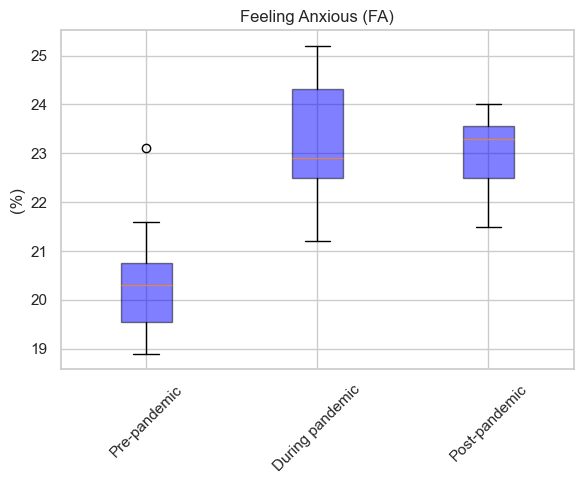

In [34]:
# create FA boxplot by period
plt.figure(figsize=(6, 5))

bp = plt.boxplot(
    [df[df["Period"] == p]["FA"] for p in df["Period"].unique()],
    labels=df["Period"].unique(),
    patch_artist=True
)

for box in bp["boxes"]:
    box.set(facecolor="blue", alpha=0.5)

plt.title("Feeling Anxious (FA)")
plt.ylabel("(%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Anxiety increased considerably during the pandemic and has not returned to pre-pandemic levels:

- Pre-pandemic: Stable, with a median around 20% and values ranging from 19% to 21%.
- During the pandemic: The median rises to 23%, with some peaks around 25%.
- Post-pandemic: The median goes back to about 23%, still above pre-pandemic levels.


C:\Users\anaco\AppData\Local\Temp\ipykernel_32184\333375599.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


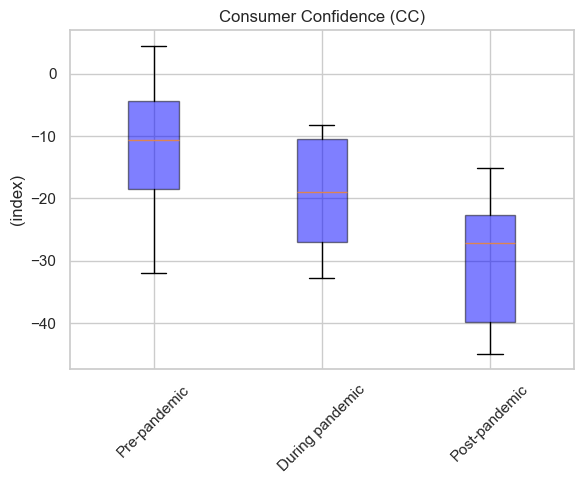

In [30]:
# create CC boxplot by period
plt.figure(figsize=(6, 5))

bp = plt.boxplot(
    [df[df["Period"] == p]["CC"] for p in df["Period"].unique()],
    labels=df["Period"].unique(),
    patch_artist=True
)

for box in bp["boxes"]:
    box.set(facecolor="blue", alpha=0.5)

plt.title("Consumer Confidence (CC)")
plt.ylabel("(index)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Consumer Confidence was already negative before the pandemic and worsened during the pandemic, decreasing even further in the post-pandemic period:
- Pre-pandemic: It ranges from –35 to +5, with a median close to –10, staying relatively stable.
- During the pandemic: It rarely goes above –10, and the median drops to –18.
- Post-pandemic: There’s a sharp decline, ranging from –25 to –45, with a median around –30.


C:\Users\anaco\AppData\Local\Temp\ipykernel_32184\2534129996.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


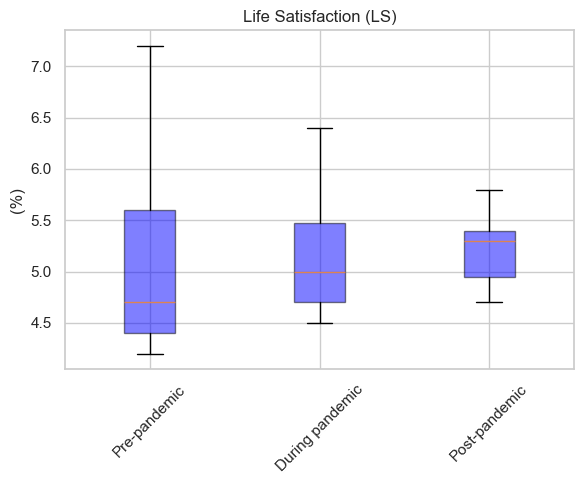

In [31]:
# create lS boxplot by period
plt.figure(figsize=(6, 5))

bp = plt.boxplot(
    [df[df["Period"] == p]["LS"] for p in df["Period"].unique()],
    labels=df["Period"].unique(),
    patch_artist=True
)

for box in bp["boxes"]:
    box.set(facecolor="blue", alpha=0.5)

plt.title("Life Satisfaction (LS)")
plt.ylabel("(%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The feeling of low life Satisfaction showed an increase during the pandemic, but less pronounced than the other variables, with a range around 4.8-5.0%.


C:\Users\anaco\AppData\Local\Temp\ipykernel_32184\932446703.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


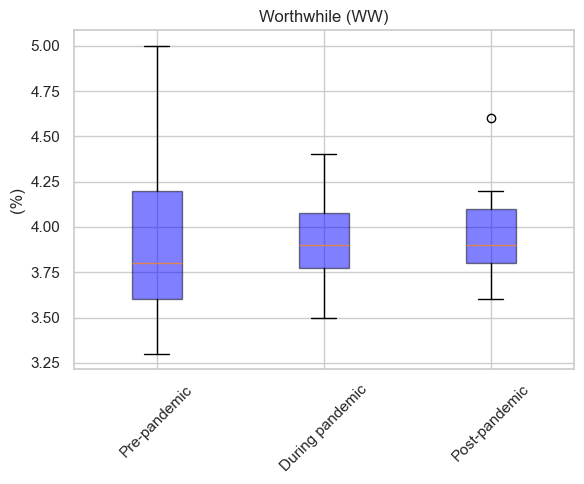

In [32]:
# create WW boxplot by period
plt.figure(figsize=(6, 5))

bp = plt.boxplot(
    [df[df["Period"] == p]["WW"] for p in df["Period"].unique()],
    labels=df["Period"].unique(),
    patch_artist=True
)

for box in bp["boxes"]:
    box.set(facecolor="blue", alpha=0.5)

plt.title("Worthwhile (WW)")
plt.ylabel("(%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Life Worthwhile remained stable across all periods, with a range around 3.8-4.0%.


C:\Users\anaco\AppData\Local\Temp\ipykernel_32184\3049432731.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


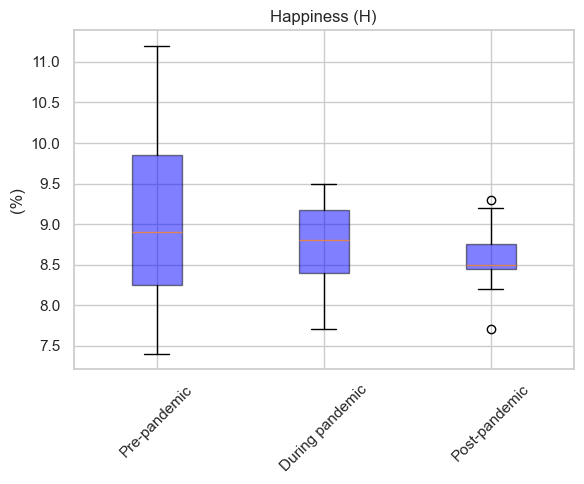

In [33]:
# create H boxplot by period
plt.figure(figsize=(6, 5))

bp = plt.boxplot(
    [df[df["Period"] == p]["H"] for p in df["Period"].unique()],
    labels=df["Period"].unique(),
    patch_artist=True
)

for box in bp["boxes"]:
    box.set(facecolor="blue", alpha=0.5)

plt.title("Happiness (H)")
plt.ylabel("(%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Happiness decreased during the pandemic and remained satble post-pandemic.

## Conclusion
The UK experienced a significant and continuous drop in economic confidence, which worsened after the pandemic. Anxiety (FA) increased sharply during the pandemic and has not returned to pre-crisis levels. We can observe that anxiety rises even when Life Satisfaction (LS) and Happiness (H) do not decline as much, suggesting that anxiety may be linked to economic uncertainty, not just subjective well-being.

Life Satisfaction (LS), Worthwhile (WW), and Happiness (H) have remained relatively stable or even improved slightly post-pandemic, which may reflect adaptation and resilience in response to the pandemic.